In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN

from scipy.signal import find_peaks

import matplotlib
from pylab import rcParams
#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})

def readfile(filename):
    types = {'frequency': float,'power': float}
    df = pd.read_csv(filename, skiprows=0, header=None, error_bad_lines=False, delim_whitespace=False, delimiter=' ')
    df.columns = ['frequency', 'power']
    df.dropna(inplace=True)
    #print(df.describe())
    return df

# Static

In [2]:
BER = pd.DataFrame(columns=["floor 1", "floor 2", "same floor", "floor 4"])

BER.iloc[:, 0] = [round(i, 6) for i in [0.12475, 0.0676271551724138, 0.09070905172413793, 0.09016893068617207]]
BER.iloc[:, 1] = [round(i, 6) for i in [0.05074568965517241, 0.046877155172413795, 0.05900431034482759, 0.07750862068965517]]
BER.iloc[:, 2] = [round(i, 6) for i in [0.0012952586206896551, 0.002900862068965517, 0.0016422413793103449, 0.019711206896551724]]
BER.iloc[:, 3] = [round(i, 6) for i in [0.07154525862068965, 0.020288793103448277, 0.031974137931034485, 0.03556896551724138]]

BER

,floor 1,floor 2,same floor,floor 4
0,0.124750,0.050746,0.001295,0.071545
1,0.067627,0.046877,0.002901,0.020289
2,0.090709,0.059004,0.001642,0.031974
3,0.090169,0.077509,0.019711,0.035569


In [3]:
RSS = pd.DataFrame(columns=["floor 1", "floor 2", "same floor", "floor 4"])

RSS.iloc[:, 0] = [round(i, 6) for i in [-110.7925, -107.035, -110.878, -110.98383838383839]]
RSS.iloc[:, 1] = [round(i, 6) for i in [-106.83, -104.422, -104.968, -110.11]]
RSS.iloc[:, 2] = [round(i, 6) for i in [-93.694, -97.3745, -95.079, -96.294]]
RSS.iloc[:, 3] = [round(i, 6) for i in [-109.821, -98.197, -102.996, -102.869]]

RSS

,floor 1,floor 2,same floor,floor 4
0,-110.792500,-106.830,-93.6940,-109.821
1,-107.035000,-104.422,-97.3745,-98.197
2,-110.878000,-104.968,-95.0790,-102.996
3,-110.983838,-110.110,-96.2940,-102.869


# Injection locking

In [4]:
BER_AID = pd.DataFrame(columns=["floor 1", "floor 2", "same floor", "floor 4"])

BER_AID.iloc[:, 0] = [round(i, 6) for i in [0.06201724137931035, 0.026191810344827586, 0.014946120689655172, 0.05502155172413793]]
BER_AID.iloc[:, 1] = [round(i, 6) for i in [0.014448275862068965, 0.0030107758620689655, 0.0008103448275862069, 0.0005366379310344828]]
BER_AID.iloc[:, 2] = [round(i, 6) for i in [0.0035005355538663533, 0.00833405172413793, 0.00047413793103448276, 0.0004806034482758621]]
BER_AID.iloc[:, 3] = [round(i, 6) for i in [0.0006961206896551724, 6.03448275862069e-05, 0.00016163793103448276, 0.0005387931034482759]]


BER_AID

,floor 1,floor 2,same floor,floor 4
0,0.062017,0.014448,0.003501,0.000696
1,0.026192,0.003011,0.008334,0.000060
2,0.014946,0.000810,0.000474,0.000162
3,0.055022,0.000537,0.000481,0.000539


In [5]:
RSS_AID = pd.DataFrame(columns=["floor 1", "floor 2", "same floor", "floor 4"])

RSS_AID.iloc[:, 0] = [round(i, 6) for i in [-109.969, -105.3395, -105.2945, -107.76]]
RSS_AID.iloc[:, 1] = [round(i, 6) for i in [-102.364, -102.805, -100.9965, -101.0235]]
RSS_AID.iloc[:, 2] = [round(i, 6) for i in [-100.75551102204409, -100.8035, -99.566, -98.5765]]
RSS_AID.iloc[:, 3] = [round(i, 6) for i in [-98.5375, -97.679, -96.708, -100.6485]]

RSS_AID

,floor 1,floor 2,same floor,floor 4
0,-109.9690,-102.3640,-100.755511,-98.5375
1,-105.3395,-102.8050,-100.803500,-97.6790
2,-105.2945,-100.9965,-99.566000,-96.7080
3,-107.7600,-101.0235,-98.576500,-100.6485


/var/folders/y7/s8r49lvj1y7ckvhcx7d8jbbr0000gn/T/ipykernel_5781/1677826210.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(tmp)


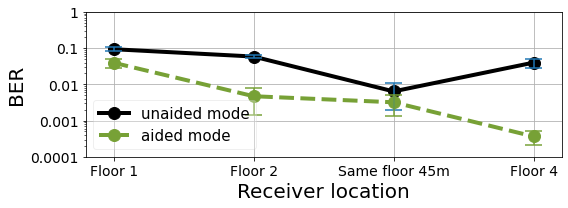

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 3
fig, ax1 = plt.subplots(1)

carrier = [0, 1, 2, 3]

df_BER = BER
df_RSS = RSS

ax1.plot(carrier, df_BER.mean(), color='black', marker='o', markersize=12, linewidth=4, label='unaided mode')
ax1.plot(carrier, BER_AID.mean(), color='#77A136', marker='o', markersize=12, linewidth=4, linestyle='--', label='aided mode')

ax1.set_xlabel('Receiver location', fontsize=20)
ax1.set_ylabel('BER', fontsize=20)
ax1.tick_params(labelsize=14)

# ax2=ax1.twinx()
# ax2.plot(carrier, df_RSS.mean(), color='#77A136', marker='o', markersize=8, linewidth=4, linestyle='--', label='RSS')
# ax2.set_ylabel('RSS [dBm]', fontsize=15, color='#77A136')
# ax2.tick_params(labelsize=14)
# ax2.set_ylim([-110,-70])

# error bar
width=0.06
mean = df_BER.mean()
std = df_BER.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s))
    ax1.hlines((m-s), d-width, d+width)
    ax1.hlines((m+s), d-width, d+width)
    
mean = BER_AID.mean()
std = BER_AID.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s), color='#77A136')
    ax1.hlines((m-s), d-width, d+width, color='#77A136')
    ax1.hlines((m+s), d-width, d+width, color='#77A136')
    
# ax1.hlines(0.001804, -70, 27, color='grey', linewidth=4, linestyle='--', label='Free running static') 
    
# mean = df_RSS.mean()
# std = df_RSS.std()
# for i in range(len(carrier)):
#     d=carrier[i]
#     m=mean[i]; s=std[i]/2
#     ax2.vlines(d, (m-s), (m+s), color='#77A136')
#     ax2.hlines((m-s), d-width, d+width, color='#77A136')
#     ax2.hlines((m+s), d-width, d+width, color='#77A136')
    
# tmp = ["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"]
# ax1.set_xticklabels(tmp)
# ax1.set_xticks(range(-37,12,10))

ax1.set_yscale('log')
tmp = [-5, -4, -3, -2, -1, 0]
tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
ax1.set_yticklabels(tmp)
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(["Floor 1", "Floor 2", "Same floor 45m", "Floor 4"])
ax1.set_ylim([1e-4,1])
ax1.set_xlim([-0.2,3.2])

ax1.grid()
ax1.legend(loc="lower left", fontsize=15, framealpha=0.3)
plt.tight_layout()
plt.savefig('./indoor_ber.pdf')

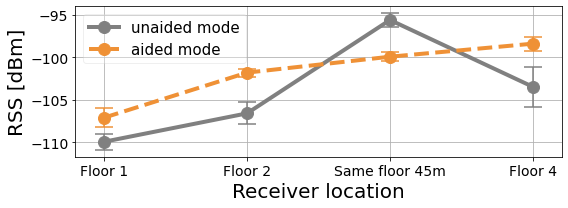

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 3
fig, ax1 = plt.subplots(1)

carrier = [0, 1, 2, 3]

ax1.plot(carrier, RSS.mean(), color='grey', marker='o', markersize=12, linewidth=4, label='unaided mode')
ax1.plot(carrier, RSS_AID.mean(), color='#EF9136', marker='o', markersize=12, linewidth=4, linestyle='--', label='aided mode')

ax1.set_xlabel('Receiver location', fontsize=20)
ax1.set_ylabel('RSS [dBm]', fontsize=20)
ax1.tick_params(labelsize=14)

# ax2=ax1.twinx()
# ax2.plot(carrier, df_RSS.mean(), color='#EF9136', marker='o', markersize=8, linewidth=4, linestyle='--', label='RSS')
# ax2.set_ylabel('RSS [dBm]', fontsize=15, color='#EF9136')
# ax2.tick_params(labelsize=14)
# ax2.set_ylim([-110,-70])

# error bar
width=0.06
mean = RSS.mean()
std = RSS.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s), color='grey')
    ax1.hlines((m-s), d-width, d+width, color='grey')
    ax1.hlines((m+s), d-width, d+width, color='grey')
    
mean = RSS_AID.mean()
std = RSS_AID.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s), color='#EF9136')
    ax1.hlines((m-s), d-width, d+width, color='#EF9136')
    ax1.hlines((m+s), d-width, d+width, color='#EF9136')
    
# ax1.hlines(0.001804, -70, 27, color='grey', linewidth=4, linestyle='--', label='Free running static') 
    
# mean = df_RSS.mean()
# std = df_RSS.std()
# for i in range(len(carrier)):
#     d=carrier[i]
#     m=mean[i]; s=std[i]/2
#     ax2.vlines(d, (m-s), (m+s), color='#EF9136')
#     ax2.hlines((m-s), d-width, d+width, color='#EF9136')
#     ax2.hlines((m+s), d-width, d+width, color='#EF9136')
    
# tmp = ["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"]
# ax1.set_xticklabels(tmp)
# ax1.set_xticks(range(-37,12,10))

# ax1.set_yscale('log')
# tmp = [-5, -4, -3, -2, -1, 0]
# tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
# ax1.set_yticklabels(tmp)
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(["Floor 1", "Floor 2", "Same floor 45m", "Floor 4"])
# ax1.set_ylim([1e-4,1])
ax1.set_xlim([-0.2,3.2])

ax1.grid()
ax1.legend(fontsize=15, framealpha=0.3)
plt.tight_layout()
plt.savefig('./indoor_rss.pdf')

/var/folders/y7/s8r49lvj1y7ckvhcx7d8jbbr0000gn/T/ipykernel_5781/462183997.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(tmp)


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (3).

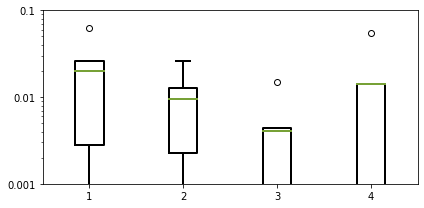

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 3
fig, ax1 = plt.subplots(1)

# xlabel = ["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Static", "Injection locking \n Dynamic"]
# ax1.bar(xlabel, df_BER.mean(), color='black', width=0.2)
boxprops = dict(linewidth=2.0, color='black')
whiskerprops = dict(linestyle='-', linewidth=2.0, color='black')
capprops = dict(linestyle='-', linewidth=2.0, color='black')
meanprops = dict(linestyle='-', linewidth=2.0, color='#77A136')
medianprops = dict(linestyle='-', linewidth=0, color='white')
ax1.boxplot(BER_AID.T, widths=0.3, meanline=True, showmeans=True, boxprops=boxprops,
            whiskerprops=whiskerprops, capprops=capprops, meanprops=meanprops, medianprops=medianprops)

ax1.set_yscale('log')
tmp = [-4, -3, -2, -1]
tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
ax1.set_yticklabels(tmp)
ax1.set_ylim([1e-3,1e-1])
ax1.set_xticklabels(["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"])
ax1.tick_params(labelsize=13)

ax1.grid()
ax1.set_ylabel("Bit error rate (BER)", fontsize=16)

ax1.tick_params(labelsize=14)

# plt.savefig('./reliability.pdf')

/var/folders/y7/s8r49lvj1y7ckvhcx7d8jbbr0000gn/T/ipykernel_5781/1699169622.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(tmp)


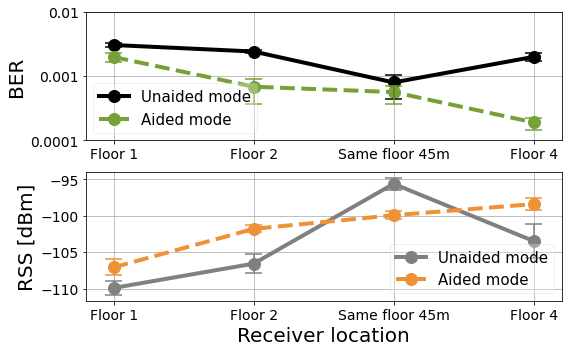

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
fig, (ax1, ax2) = plt.subplots(2,1)

carrier = [0, 1, 2, 3]

df_BER = BER
df_RSS = RSS

ax1.plot(carrier, df_BER.mean(), color='black', marker='o', markersize=12, linewidth=4, label='Unaided mode')
ax1.plot(carrier, BER_AID.mean(), color='#77A136', marker='o', markersize=12, linewidth=4, linestyle='--', label='Aided mode')

# ax1.set_xlabel('Receiver location', fontsize=20)
ax1.set_ylabel('BER', fontsize=20)
ax1.tick_params(labelsize=14)

# ax2=ax1.twinx()
# ax2.plot(carrier, df_RSS.mean(), color='#77A136', marker='o', markersize=8, linewidth=4, linestyle='--', label='RSS')
# ax2.set_ylabel('RSS [dBm]', fontsize=15, color='#77A136')
# ax2.tick_params(labelsize=14)
# ax2.set_ylim([-110,-70])

# error bar
width=0.06
mean = df_BER.mean()
std = df_BER.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s), color='black')
    ax1.hlines((m-s), d-width, d+width, color='black')
    ax1.hlines((m+s), d-width, d+width, color='black')
    
mean = BER_AID.mean()
std = BER_AID.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax1.vlines(d, (m-s), (m+s), color='#77A136')
    ax1.hlines((m-s), d-width, d+width, color='#77A136')
    ax1.hlines((m+s), d-width, d+width, color='#77A136')
    
# ax1.hlines(0.001804, -70, 27, color='grey', linewidth=4, linestyle='--', label='Free running static') 
    
# mean = df_RSS.mean()
# std = df_RSS.std()
# for i in range(len(carrier)):
#     d=carrier[i]
#     m=mean[i]; s=std[i]/2
#     ax2.vlines(d, (m-s), (m+s), color='#77A136')
#     ax2.hlines((m-s), d-width, d+width, color='#77A136')
#     ax2.hlines((m+s), d-width, d+width, color='#77A136')
    
# tmp = ["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"]
# ax1.set_xticklabels(tmp)
# ax1.set_xticks(range(-37,12,10))

ax1.set_yscale('log')
tmp = [-5, -4, -3, -2, -1, 0]
tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
ax1.set_yticklabels(tmp)
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels(["Floor 1", "Floor 2", "Same floor 45m", "Floor 4"])
ax1.set_ylim([1e-4,1])
ax1.set_xlim([-0.2,3.2])

ax1.grid()
ax1.legend(loc="lower left", fontsize=15, framealpha=0.3)



carrier = [0, 1, 2, 3]

ax2.plot(carrier, RSS.mean(), color='grey', marker='o', markersize=12, linewidth=4, label='Unaided mode')
ax2.plot(carrier, RSS_AID.mean(), color='#EF9136', marker='o', markersize=12, linewidth=4, linestyle='--', label='Aided mode')

ax2.set_xlabel('Receiver location', fontsize=20)
ax2.set_ylabel('RSS [dBm]', fontsize=20)
ax2.tick_params(labelsize=14)

# ax2=ax2.twinx()
# ax2.plot(carrier, df_RSS.mean(), color='#EF9136', marker='o', markersize=8, linewidth=4, linestyle='--', label='RSS')
# ax2.set_ylabel('RSS [dBm]', fontsize=15, color='#EF9136')
# ax2.tick_params(labelsize=14)
# ax2.set_ylim([-110,-70])

# error bar
width=0.06
mean = RSS.mean()
std = RSS.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax2.vlines(d, (m-s), (m+s), color='grey')
    ax2.hlines((m-s), d-width, d+width, color='grey')
    ax2.hlines((m+s), d-width, d+width, color='grey')
    
mean = RSS_AID.mean()
std = RSS_AID.std()
for i in range(len(carrier)):
    d=carrier[i]
    m=mean[i]; s=std[i]/2
    ax2.vlines(d, (m-s), (m+s), color='#EF9136')
    ax2.hlines((m-s), d-width, d+width, color='#EF9136')
    ax2.hlines((m+s), d-width, d+width, color='#EF9136')
    
# ax2.hlines(0.001804, -70, 27, color='grey', linewidth=4, linestyle='--', label='Free running static') 
    
# mean = df_RSS.mean()
# std = df_RSS.std()
# for i in range(len(carrier)):
#     d=carrier[i]
#     m=mean[i]; s=std[i]/2
#     ax2.vlines(d, (m-s), (m+s), color='#EF9136')
#     ax2.hlines((m-s), d-width, d+width, color='#EF9136')
#     ax2.hlines((m+s), d-width, d+width, color='#EF9136')
    
# tmp = ["Free running \n Static", "Free running \n Dynamic", "Injection locking \n Dynamic"]
# ax2.set_xticklabels(tmp)
# ax2.set_xticks(range(-37,12,10))

# ax2.set_yscale('log')
# tmp = [-5, -4, -3, -2, -1, 0]
# tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
# ax2.set_yticklabels(tmp)
ax2.set_xticks([0,1,2,3])
ax2.set_xticklabels(["Floor 1", "Floor 2", "Same floor 45m", "Floor 4"])
# ax2.set_ylim([1e-4,1])
ax2.set_xlim([-0.2,3.2])

ax2.grid()
ax2.legend(fontsize=15, framealpha=0.3)
plt.tight_layout()
plt.savefig('./indoor.pdf')

# Freq drift

In [76]:
BER_T_1 = [round(i, 6) for i in [0.0064698275862068964, 0.005823275862068966, 0.004838362068965517, 0.005618534482758621, 0.006745689655172414, 0.007868534482758621, 0.007181034482758621, 0.006719827586206897, 0.009198275862068965, 0.01965301724137931, 0.010079741379310345, 0.007344827586206896, 0.0063857758620689655, 0.008178879310344828, 0.007364224137931035, 0.00990301724137931, 0.009941810344827585, 0.008148706896551724, 0.008400862068965518, 0.009288793103448276, 0.008448275862068965, 0.009450431034482759, 0.011390086206896551, 0.009810344827586207]]

RSS_T_1 = [round(i, 6) for i in [-96.556, -96.757, -96.3125, -96.251, -96.3745, -96.408, -96.6545, -96.708, -97.711, -99.1965, -97.856, -97.052, -96.6525, -96.8585, -96.8005, -97.1245, -97.2135, -96.703, -96.991, -97.4645, -97.038, -97.453, -97.667, -97.433]]

In [78]:
BER_T_2 = [round(i, 6) for i in [0.003752155172413793, 0.005767241379310345, 0.003269396551724138, 0.0033599137931034483, 0.004306034482758621, 0.0044849137931034485, 0.004685344827586207, 0.004424568965517241, 0.004568965517241379, 0.004564655172413793, 0.0048620689655172415, 0.004773706896551724, 0.005, 0.004310344827586207, 0.005321120689655173, 0.0043017241379310345, 0.002816810344827586, 0.004314655172413793, 0.00340301724137931, 0.0028081896551724137, 0.0035732758620689656, 0.002767241379310345, 0.002618534482758621, 0.002670258620689655]]

RSS_T_2 = [round(i, 6) for i in [-93.6265, -94.796, -93.9365, -92.4215, -92.7305, -92.8625, -92.72, -93.008, -92.456, -92.983, -92.9905, -92.788, -93.123, -93.109, -93.5125, -93.191, -92.7055, -94.1335, -93.882, -94.1395, -93.5175, -92.8985, -90.637, -90.9215]]

In [87]:
BER_T_3 = [round(i, 6) for i in [5.3879310344827585e-05, 0.00014224137931034483, 0.00013793103448275863, 0.00014870689655172413, 0.00028017241379310343, 3.017241379310345e-05, 3.4482758620689657e-05, 3.663793103448276e-05, 8.189655172413794e-05, 6.681034482758621e-05, 3.8793103448275865e-05, 2.8017241379310345e-05, 3.4482758620689657e-05, 2.3706896551724137e-05, 3.663793103448276e-05, 3.232758620689655e-05, 3.663793103448276e-05, 2.3706896551724137e-05, 4.094827586206897e-05, 4.525862068965517e-05, 4.956896551724138e-05, 3.663793103448276e-05, 2.1551724137931033e-05, 3.017241379310345e-05]]

RSS_T_3 = [round(i, 6) for i in [-94.5535, -94.2215, -94.8975, -94.588, -94.576, -94.626, -94.559, -94.5625, -94.5615, -94.6075, -94.568, -94.571, -94.5695, -94.5685, -94.6, -94.5625, -94.5725, -94.535, -94.5155, -94.563, -94.8255, -94.8195, -94.2695, -94.5395]]

In [88]:
BER_T_4 = [round(i, 6) for i in [0.0014267241379310345, 0.0003125, 0.00017241379310344826, 0.00017672413793103447, 0.00026724137931034484, 0.00028663793103448276, 0.0002607758620689655, 0.00026508620689655175, 0.0013814655172413794, 0.00020689655172413793, 0.00017672413793103447, 0.0001896551724137931, 0.00015732758620689655, 0.00022198275862068967, 0.00018534482758620689, 0.00021336206896551725, 0.0002543103448275862, 0.00026939655172413793, 0.0031336206896551725, 0.00020043103448275863, 0.0015193965517241378, 0.00017456896551724138, 0.0001293103448275862, 0.000125]]

RSS_T_4 = [round(i, 6) for i in [-96.1495, -93.718, -93.771, -93.7935, -93.78, -93.7315, -93.77, -93.6915, -93.7675, -93.725, -93.7435, -93.6805, -93.7175, -93.7255, -93.7505, -93.786, -93.779, -93.709, -97.4295, -93.773, -96.8345, -93.8175, -93.318, -93.4615]]

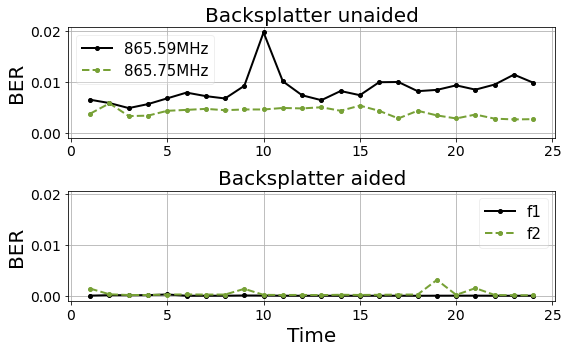

In [101]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
fig, [ax1, ax2] = plt.subplots(2,1, sharey=True)

carrier = range(1,25)

ax1.plot(carrier, BER_T_1, color='black', marker='o', markersize=4, linewidth=2, label='865.59MHz')
ax1.plot(carrier, BER_T_2, color='#77A136', marker='o', markersize=4, linewidth=2, linestyle='--', label='865.75MHz')

# ax1.set_xlabel('Time', fontsize=20)
ax1.set_ylabel('BER', fontsize=20)
ax1.set_title("Backsplatter unaided", fontsize=20)
ax1.tick_params(labelsize=14)

ax1.grid()
ax1.legend(fontsize=15, framealpha=0.3)

ax2.plot(carrier, BER_T_3, color='black', marker='o', markersize=4, linewidth=2, label='f1')
ax2.plot(carrier, BER_T_4, color='#77A136', marker='o', markersize=4, linewidth=2, linestyle='--', label='f2')

ax2.set_xlabel('Time', fontsize=20)
ax2.set_ylabel('BER', fontsize=20)
ax2.set_title("Backsplatter aided", fontsize=20)
ax2.tick_params(labelsize=14)

ax2.grid()
ax2.legend(fontsize=15, framealpha=0.3)


# plt.tight_layout()
# plt.savefig('./indoor_ber.pdf')

In [90]:
ax2.plot(carrier, BER_T_1, color='black', marker='o', markersize=4, linewidth=2, label='unaided mode')
ax2.plot(carrier, BER_T_2, color='#77A136', marker='o', markersize=4, linewidth=2, linestyle='--', label='aided mode')

ax2.set_xlabel('Time', fontsize=20)
ax2.set_ylabel('BER', fontsize=20)
ax2.tick_params(labelsize=14)

ax2.grid()
ax2.legend(fontsize=15, framealpha=0.3)